# Exercise 4.1: The expression for the period $T$ of a *realistic pendulum*, for which the maximum angle of displacement is $\theta_0$, when $\theta_0$ is not necessarily small, is given by:

$T = \frac{T_0}{\pi} \int_0^{\theta_0} \frac{ \mathrm{d} \theta } { [\sin^2 (\theta_0/2) - \sin^2 (\theta/2)]^{1/2}}$,

where $T_0$ is the period for small-angle oscillations. 

By expanding the denominator and integrating it term-by-term, we can obtain a series expansion for the period:

$T \simeq T_0 \left[ 1 + \left(\frac{1}{2}\right)^2 \sin^2 \frac{\theta_0}{2} + \left( \frac{1 \cdot 3}{2 \cdot 4}\right)^2 \sin^4 \frac{\theta_0}{2} + \left( \frac{1 \cdot 3 \cdot 5}{2 \cdot 4 \cdot 6}\right)^2 \sin^6 \frac{\theta_0}{2} ...\right]$.

The expansion tells us e.g. that an amplitude $\theta_0 = 80^\circ$ leads to a 10\% slowdown of the pendulum relative to the small $\theta$ result. 

We will determine the period computationally, without the need for any expansions. 

(a) Use numerical quadrature to determine the ratio $T/T_0$ for six values of $\theta_0$ in the interval $[0,\pi/2]$. Show that you have attained at least four places of accuracy by progressively increasing the number of integration points until changes occur only in the fifth place or beyond. 

(b) Use the power series to determine $T/T_0$. Continue summing terms until changes in the sum occur only in the fifth place, or beyond. 

(c) Plot the values you obtained for $T/T_0$ vs. $\theta_0$ for both the integral and power series solution. 

BONUS 10%:

(d) Use Scipy's ```scipy.integrate.quad``` to perform the integral at the same values. Plot these as well as a third answer.

## Solution(a)

We make use of the ```gauss``` integrator from the lecture to compute the ratio of the periods. I use a list of angles in conjunction with a partial function to accomodate the format of ```gauss```. In order to achieve the right precision, I compare the value of the integral for $n$ sample points to the mean of the integral for $n+10$ and $n+20$ sample points. This approach attempts to minimize "aritifical precision" that could arise due to oscillations in the ratio.

In [4]:
import math
import scipy # we need scipy for the N-th order Legendre polynomials.
from math import pi
from functools import partial

thetaList = [pi/12,pi/8,pi/6,pi/4,pi/3,pi/2] # large angles from from which T/T0 will be calculated

# Let's write a higher-order function that implements N-th order Gaussian quadrature:
def gauss(func, a, b, N):
    """Calculates the numerical integral of a function in the interval a,b using N-th order Gaussian quadrature"""
    # N-th order Gaussian quadrature 
    # get the weights and points from the scipy special function:
    xi, wi = scipy.special.roots_legendre(int(N))
    # now use the general formula to get the integral:
    integral = 0
    for j, wj in enumerate(wi):
        # calculate the x value using the xi array:
        xj = 0.5*((b-a) * xi[j] + b + a) # transform the xi[j] to the function argument, xj
        integral = integral + wj * func(xj)
    return (b-a)/2 * integral

def f(theta0,theta): # when f is integrated with respect to theta from 0 to theta0, the ratio T/T0 will be obtained
    return 1/(pi*(math.sqrt(math.sin(theta0/2)**2-math.sin(theta/2)**2)))

result1 = [] # we will store the ratios in a list
for theta0 in thetaList:
    runningavg = 0
    n = 10
    diff = 1
    while abs(diff) > 1E-5: # checks that the precision in the ratio is in the 5th decimal by comparing the integral for n points to the average of the integrals for n+10 and n+20 points
        n = n + 1 # increments number of points
        runningavg = 1/2*(gauss(partial(f,theta0),0,theta0,n+10)+gauss(partial(f,theta0),0,theta0,n+20)) # average of two future results
        diff = gauss(partial(f,theta0),0,theta0,n)-runningavg # difference between current result and the average of the next five
        #print(diff)
    print("The ratio T/T0 for theta0 =", theta0, "is ", round(gauss(partial(f,theta0),0,theta0,n),4), ". This took", n, "function evaluations.")
    result1.append(gauss(partial(f,theta0),0,theta0,n))
    

The ratio T/T0 for theta0 = 0.2617993877991494 is  1.0038 . This took 761 function evaluations.
The ratio T/T0 for theta0 = 0.39269908169872414 is  1.0092 . This took 763 function evaluations.
The ratio T/T0 for theta0 = 0.5235987755982988 is  1.0169 . This took 767 function evaluations.
The ratio T/T0 for theta0 = 0.7853981633974483 is  1.0394 . This took 779 function evaluations.
The ratio T/T0 for theta0 = 1.0471975511965976 is  1.0726 . This took 796 function evaluations.
The ratio T/T0 for theta0 = 1.5707963267948966 is  1.1798 . This took 850 function evaluations.


## Solution (b)

This is just a straightworward implementation of the above series.

In [5]:
# gives the nth term in the series expansion of the ratio T/T0
def term(n,theta0):
    oddList = []
    evenList = []
    # generate the first n evens and first n odds
    for i in range(n):
        oddList.append(2*i+1) # starts with 1
        evenList.append(2*i+2) # starts with 2

    # construct the square of the quotient of the product of first n odds with product of first n evens
    factor = 1 
    for i in range (n):
        factor = factor*(oddList[i]/evenList[i])**2

    contribution = factor*(math.sin(theta0/2))**(2*n)

    return contribution

result2 = []
for theta0 in thetaList:
    sum = 0
    i = 0 # keeps track of the term in the series
    while term(i,theta0)-term(i+1,theta0) > 1E-5:
        sum = sum + term(i,theta0) # add the ith term
        i = i+1
    print("The ratio T/T0 for theta0 =", theta0, "is ", round(sum,4), ". This took", i, "terms.")
    result2.append(sum)

The ratio T/T0 for theta0 = 0.2617993877991494 is  1.0043 . This took 3 terms.
The ratio T/T0 for theta0 = 0.39269908169872414 is  1.0097 . This took 3 terms.
The ratio T/T0 for theta0 = 0.5235987755982988 is  1.0174 . This took 4 terms.
The ratio T/T0 for theta0 = 0.7853981633974483 is  1.04 . This took 5 terms.
The ratio T/T0 for theta0 = 1.0471975511965976 is  1.0732 . This took 6 terms.
The ratio T/T0 for theta0 = 1.5707963267948966 is  1.1803 . This took 11 terms.


## Solution (c)

We simply plot the results we calculated in the previous parts. We see that the Gaussian quadrature slightly underestimates the ratio as compared to the series approximation. Presumably this is because the corrections to the ratio for successive terms in the series is more easily predictable than that of the quadrature.

[Text(0.2617993877991494, 0, '$\\dfrac{\\pi}{12}$'),
 Text(0.39269908169872414, 0, '$\\dfrac{\\pi}{8}$'),
 Text(0.5235987755982988, 0, '$\\dfrac{\\pi}{6}$'),
 Text(0.7853981633974483, 0, '$\\dfrac{\\pi}{4}$'),
 Text(1.0471975511965976, 0, '$\\dfrac{\\pi}{3}$'),
 Text(1.5707963267948966, 0, '$\\dfrac{\\pi}{2}$')]

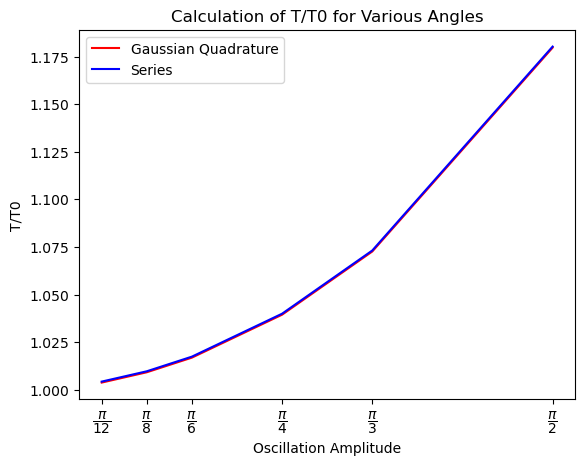

In [34]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots() # creates the plot axes
    
axes.plot(thetaList, result1, color='red', label='Gaussian Quadrature') 
axes.plot(thetaList, result2, color='blue', label='Series')
axes.legend()
axes.set_title("Calculation of T/T0 for Various Angles")
axes.set_xlabel("Oscillation Amplitude")
axes.set_ylabel("T/T0")
axes.set_xticks([pi/12,pi/8,pi/6,pi/4,pi/3,pi/2])
axes.set_xticklabels([r'$\dfrac{\pi}{12}$',r'$\dfrac{\pi}{8}$',r'$\dfrac{\pi}{6}$',r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{3}$',r'$\dfrac{\pi}{2}$'])

## Solution (d)

[Text(0.2617993877991494, 0, '$\\dfrac{\\pi}{12}$'),
 Text(0.39269908169872414, 0, '$\\dfrac{\\pi}{8}$'),
 Text(0.5235987755982988, 0, '$\\dfrac{\\pi}{6}$'),
 Text(0.7853981633974483, 0, '$\\dfrac{\\pi}{4}$'),
 Text(1.0471975511965976, 0, '$\\dfrac{\\pi}{3}$'),
 Text(1.5707963267948966, 0, '$\\dfrac{\\pi}{2}$')]

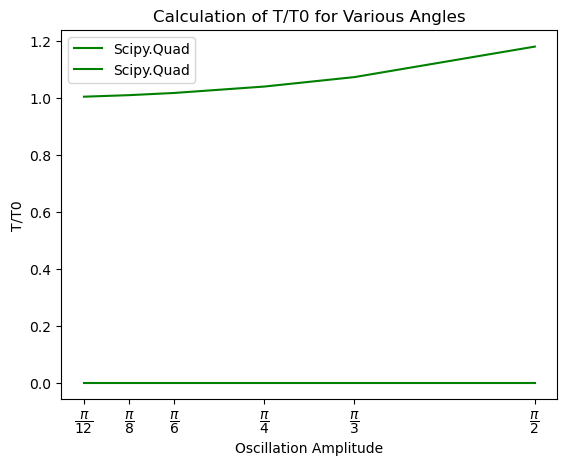

In [36]:
result3 = []
for theta0 in thetaList:
    result3.append(scipy.integrate.quad(partial(f,theta0),0,theta0))
    
fig, axes = plt.subplots() # creates the plot axes
    
#axes.plot(thetaList, result1, color='red', label='Gaussian Quadrature') 
#axes.plot(thetaList, result2, color='blue', label='Series')
axes.plot(thetaList, result3, color='green', label='Scipy.Quad')
axes.legend()
axes.set_title("Calculation of T/T0 for Various Angles")
axes.set_xlabel("Oscillation Amplitude")
axes.set_ylabel("T/T0")
axes.set_xticks([pi/12,pi/8,pi/6,pi/4,pi/3,pi/2])
axes.set_xticklabels([r'$\dfrac{\pi}{12}$',r'$\dfrac{\pi}{8}$',r'$\dfrac{\pi}{6}$',r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{3}$',r'$\dfrac{\pi}{2}$'])